### Project 2 
This explanation are mainly from different sections of the scikit-learn tutorial on text classification available at http://scikit-learn.org.

### Dataset
1. In this project we work with “20 Newsgroups” dataset. It is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic.
2. To manually load the data, you need to run this python code.<a href="https://www.dropbox.com/s/5oek8qbsge1y64b/fetch_data.py?dl=0">link to fetch_data.py</a>
3. Easiest way to load the data is to use the built-in dataset loader for 20 newsgroups from scikit-learn package.


In [1]:
from sklearn.datasets import fetch_20newsgroups
categories = [ 'comp.graphics', 'comp.sys.mac.hardware']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
def get_Number(fileName):
    count_vect = CountVectorizer()
    categories = [fileName]
    comp_graphic_train = fetch_20newsgroups(subset='train', categories=categories)
    comp_graphics_number = count_vect.fit_transform(comp_graphic_train.data)
    #print("(number of documents, number of features) = (%s, %s) " % comp_graphics_number.shape)
    [r,v] = comp_graphics_number.shape
    return r

comp_graphics_number = get_Number('comp.graphics')
comp_os_mswindows_misc_number = get_Number('comp.os.ms-windows.misc')
comp_sys_ibm_pc_hardware_number = get_Number('comp.sys.ibm.pc.hardware')
comp_sys_mac_hardware_number = get_Number('comp.sys.mac.hardware')
rec_autos_number = get_Number('rec.autos')
rec_motorcycles_number = get_Number('rec.motorcycles')
rec_sport_baseball_number = get_Number('rec.sport.baseball')
rec_sport_hockey_number = get_Number('rec.sport.hockey')



Number of class is = 2343
Number of class is = 2343


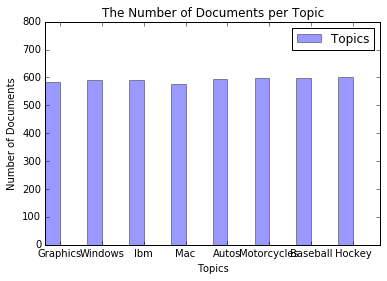

In [3]:
Number_Computer_technology = comp_graphics_number+comp_os_mswindows_misc_number+comp_sys_ibm_pc_hardware_number+comp_sys_mac_hardware_number
Number_Recreational_activity = rec_autos_number+rec_motorcycles_number+rec_sport_baseball_number+rec_sport_hockey_number

print("Number of class is = %s" % Number_Computer_technology)
print("Number of class is = %s" % Number_Computer_technology)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n_groups = 8

document_number = (comp_graphics_number, comp_os_mswindows_misc_number, comp_sys_ibm_pc_hardware_number, comp_sys_mac_hardware_number, rec_autos_number, rec_motorcycles_number, rec_sport_baseball_number, rec_sport_hockey_number)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
rects = plt.bar(index, document_number, bar_width,alpha=opacity, color='b',label='Topics')

plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('The Number of Documents per Topic')
plt.xticks(index + bar_width, ('Graphics', 'Windows', 'Ibm', 'Mac', 'Autos', 'Motorcycles', 'Baseball', 'Hockey'))
plt.ylim(0,800)
plt.legend()


In [6]:
# print type(twenty_train)
#Use help() command to know more about your object
# print help(twenty_train)
# print twenty_train.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']


In [40]:
#print twenty_train.data[0]
#print twenty_train.target[0]
#print twenty_train.target_names[twenty_train.target[0]]

From: winstead@faraday.ece.cmu.edu (Charles Holden Winstead)
Subject: ftp site for Radius software???
Organization: Electrical and Computer Engineering, Carnegie Mellon

Hey All,

Does anyone know if I can ftp to get the newest version of Radiusware
and soft pivot from Radius?  I bought a pivot monitor, but it has an
old version of this software and won't work on my C650, and Radius said
it would be 4-5 weeks until delivery.

Thanks!

-Chuck



1
comp.sys.mac.hardware


In [32]:
#print twenty_train.target_names

['comp.graphics', 'comp.sys.mac.hardware']


The files themselves are loaded in memory in the data attribute.

In [33]:
#print len(twenty_train.data)
#print len(twenty_train.filenames)
#print len(twenty_train.target)
#print len(twenty_train.target_names)

1162
1162
1162
2


### Extracting features from text files

### CountVectorizer
Convert a collection of text documents to a matrix of token counts

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1)
vectorizer  

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print stop_words
print len(stop_words)

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

In [25]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
X 

<4x9 sparse matrix of type '<type 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [26]:
help(vectorizer)

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.coo_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Parameters
 |  ----------
 |  input : string {'filename', 'file', 'content'}
 |      If 'filename', the sequence passed as an argument to fit is
 |      expected to be a list of filenames that need reading to fetch
 |      the raw content to analyze.
 |  
 |      If 'file', the sequence items must have a 'read' method (file-like
 |      object) that is called to fetch the bytes in memory.
 |  
 |      Otherwise the input is expected to

In [14]:
vectorizer.get_feature_names() == (
    ['and', 'document', 'first', 'is', 'one',
     'second', 'the', 'third', 'this'])


X.toarray()   

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:

In [15]:
vectorizer.vocabulary_.get('document')

1

In [16]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(1162, 19610)

In [17]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))


print count_vect.vocabulary_.keys()[0:10]
print take(5,count_vect.vocabulary_.iteritems())
print count_vect.vocabulary_.get('3ds2scn')

[u'3ds2scn', u'four', u'compatable', u'circuitry', u'ebth', u'hanging', u'woody', u'spidery', u'shure', u'increase']
[(u'3ds2scn', 1349), (u'four', 8380), (u'compatable', 5494), (u'circuitry', 5161), (u'ebth', 7243)]
1349


In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape
X_train_tfidf.toarray()[:30,:10]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

### Training a classifier

Let's train a classifier to predict the category of a post.

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [20]:
docs_new = ['He is an OS developer', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'He is an OS developer' => comp.sys.mac.hardware
'OpenGL on the GPU is fast' => comp.graphics


### Building a pipeline
In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [21]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [22]:
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [23]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target) 

0.9315245478036176

In [24]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

metrics.confusion_matrix(twenty_test.target, predicted)

                       precision    recall  f1-score   support

        comp.graphics       0.97      0.89      0.93       389
comp.sys.mac.hardware       0.90      0.97      0.93       385

          avg / total       0.93      0.93      0.93       774



array([[346,  43],
       [ 10, 375]])